In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score

In [21]:
X_label_data=pd.read_csv("final_data.csv")
X_unlabel_data=pd.read_csv("mis_final_data.csv")
label_y=pd.read_csv("Training Data Target.csv")

In [3]:
X_label_data.drop(['Unnamed: 0',"id"],axis=1).drop_duplicates(keep="first")

,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,...,n_Fitness,n_BoardGames,n_PainitingSupplies,n_Gaming,n_TVs,n_Laptops,n_BeautyProducts,n_PetSupplies,n_Ereaders,n_KitchencleaningSupplies
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,12056.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,574.0,0.0,0.0,1012.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13239,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1033.0,0.0,0.0,0.0,0.0,16353.0,0.0
13240,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_label_data

,Unnamed: 0,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,...,n_BoardGames,n_PainitingSupplies,n_Gaming,n_TVs,n_Laptops,n_BeautyProducts,n_PetSupplies,n_Ereaders,n_KitchencleaningSupplies,id
0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,...,0.0,0.0,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,3,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,4,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,13241,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49999.0
13241,13242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50030.0
13242,13243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50066.0
13243,13244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50075.0


In [27]:
X_label_data.describe().iloc[:,:18]

,Unnamed: 0,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,Home Decor,Kitchen cleaning Supplies,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs
count,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000
mean,6623.000000,0.428766,0.097697,0.099056,0.201208,0.431333,0.171234,2.040921,0.156889,0.406493,0.434202,1.008607,0.110985,0.102227,0.100491,0.159003,2.300340,0.107512
std,3823.646493,0.657303,0.314933,0.313306,0.449065,0.501643,0.402878,1.415383,0.383712,0.639805,0.653725,1.003731,0.332119,0.304450,0.316806,0.387935,1.119729,0.310019
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,6623.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,9934.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,13245.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,9.000000,2.000000,4.000000,4.000000,8.000000,3.000000,2.000000,3.000000,3.000000,7.000000,2.000000


In [30]:
X_label_data.describe().iloc[:,18:]

,Toys,n_Phones,n_Fashion,n_Home Decor,n_ConsumerDurables,n_BacktoSchool,n_Toys,n_Books,n_Groceries,n_Fitness,n_BoardGames,n_PainitingSupplies,n_Gaming,n_TVs,n_Laptops,n_BeautyProducts,n_PetSupplies,n_Ereaders,n_KitchencleaningSupplies,id
count,13245.000000,13245.000000,13245.000000,13245.000000,13245.0,13245.0,13245.000000,13245.000000,13245.000000,13245.000000,13245.0,13245.0,13245.000000,13245.000000,13245.000000,13245.0,13245.0,13245.000000,13245.0,13245.000000
mean,0.718007,37588.347829,1427.238354,329.318535,0.0,0.0,520.501699,129.139222,669.125330,866.768290,0.0,0.0,508.651793,4637.444017,4538.837901,0.0,0.0,2434.967157,0.0,25096.183541
std,0.850309,20717.814407,1010.537095,350.911055,0.0,0.0,671.802098,312.600371,1110.021821,2357.906755,0.0,0.0,882.411024,14537.962373,14675.391742,0.0,0.0,6010.218333,0.0,14519.917378
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
25%,0.000000,22489.000000,686.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,12549.000000
50%,1.000000,36988.000000,1341.000000,274.000000,0.0,0.0,171.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,25062.000000
75%,1.000000,51005.000000,2074.000000,516.000000,0.0,0.0,899.000000,0.000000,1255.000000,0.000000,0.0,0.0,933.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,37708.000000
max,7.000000,147686.000000,6627.000000,2636.000000,0.0,0.0,4599.000000,2901.000000,7465.000000,26014.000000,0.0,0.0,6807.000000,105696.000000,135237.000000,0.0,0.0,50371.000000,0.0,50079.000000


In [122]:
import seaborn as sns

<AxesSubplot:xlabel='Fashion', ylabel='Count'>

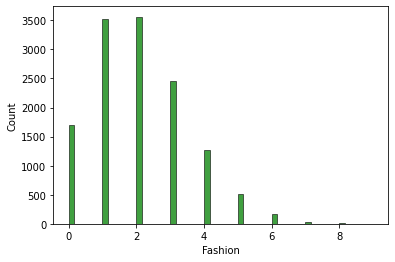

In [125]:
sns.histplot(X_label_data["Fashion"],color="green")

<AxesSubplot:xlabel='Beauty Products', ylabel='Count'>

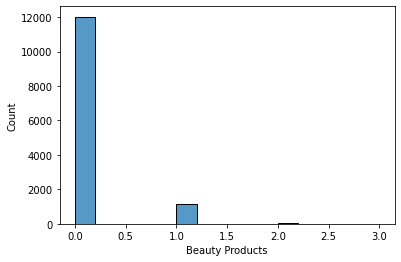

In [138]:
sns.histplot(X_label_data["Beauty Products"])

E:\User\My_Playground\envs\tensorflowGPU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fashion', ylabel='category'>

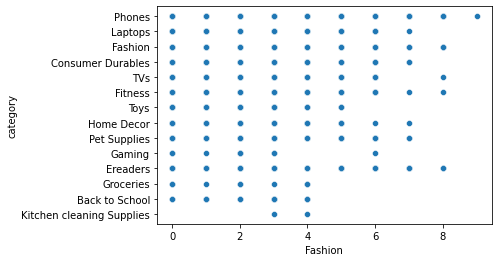

In [139]:
sns.scatterplot(X_label_data["Fashion"],label_y.sort_values(by="user_id")["category"])

<AxesSubplot:>

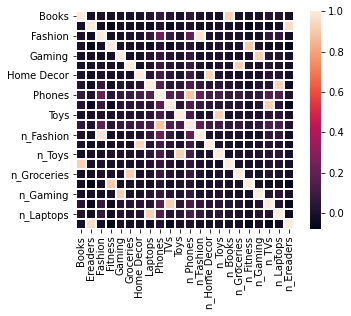

In [134]:
corr=X_data.corr()
sns.heatmap(corr,square=True,linewidths=1)

In [35]:
label_y["category"].value_counts()

Phones                       7124
Fashion                      2195
Pet Supplies                  910
Ereaders                      887
Fitness                       874
TVs                           426
Laptops                       308
Home Decor                    238
Consumer Durables             186
Toys                           58
Back to School                 19
Gaming                         10
Groceries                       8
Kitchen cleaning Supplies       2
Name: category, dtype: int64

In [130]:
X_data=X_label_data.drop(["Unnamed: 0","id","n_ConsumerDurables","n_BacktoSchool","n_BoardGames","n_PainitingSupplies","n_BeautyProducts","n_PetSupplies","n_KitchencleaningSupplies","Consumer Durables","Back to School","Board Games","Painiting Supplies","Beauty Products","Pet Supplies","Kitchen cleaning Supplies"],axis=1)

In [41]:
y_data=label_y.sort_values(by="user_id")["category"].to_numpy()

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X-label_data,y_data,test_size=0.1)

In [56]:
from xgboost import XGBClassifier

In [110]:
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)

E:\User\My_Playground\envs\tensorflowGPU\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:16:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
test_pre=xgb_clf.predict(X_test)
train_pre=xgb_clf.predict(X_train)

In [118]:
grb_clf=GradientBoostingClassifier(n_estimators=400)
grb_clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=400)

In [119]:
test_pre=grb_clf.predict(X_test)
train_pre=grb_clf.predict(X_train)

In [120]:
precision_score(y_test,test_pre,average="micro")

0.8238255033557047

In [121]:
precision_score(y_train,train_pre,average="micro")

0.9120991797166293

In [139]:
pro_sub_y=grb_clf.predict_proba(sub_test_X)

In [141]:
sub_y=grb_clf.predict(sub_test_X)

In [143]:
ktr=['Back to School',
 'Consumer Durables',
 'Ereaders',
 'Fashion',
 'Fitness',
 'Gaming',
 'Groceries',
 'Home Decor',
 'Kitchen cleaning Supplies',
 'Laptops',
 'Pet Supplies',
 'Phones',
 'TVs',
 'Toys']

In [144]:
ktr_arr=np.array(ktr)
top_3_sub=[]
for a in pro_sub_y:
    lis=sorted(range(len(a)), key=lambda i: a[i])[-3:]
    pred_cat=ktr_arr[lis]
    text_for=pred_cat[2]+',  '+pred_cat[1]+',  '+pred_cat[0]
    top_3_sub.append(text_for)
    
    

In [145]:
sub_dataframe=pd.DataFrame({"user_id":final_data_end["id"].to_numpy().astype(np.int64),"pred3":top_3_sub})

In [146]:
final_data_end["id"].to_numpy().astype(np.int)

<ipython-input-146-57d6d50aaf53>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final_data_end["id"].to_numpy().astype(np.int)


array([    2,     3,     8, ..., 50050, 50074, 50089])

In [148]:
sub_dataframe.head()

,user_id,pred3
0,2,"Fashion, Phones, Fitness"
1,3,"Fashion, Ereaders, Phones"
2,8,"Fashion, Phones, Laptops"
3,10,"Phones, Fashion, Fitness"
4,13,"Phones, Fashion, Home Decor"


In [150]:
sub_dataframe.to_csv("submission_1.csv",index=False)